In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('loan.csv')
pd.set_option('display.max_columns', None)

C:\Users\Sohit\AppData\Local\Temp\ipykernel_5908\188917034.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Analyze the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
round(df.isnull().sum()/len(df)*100)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

# data cleaning

In [7]:
df1 = df.drop(df.columns[df.apply(lambda col: col.isnull().sum()/len(df) > 0.30)], axis=1)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
df1 = df1.drop(['id','member_id','sub_grade','pymnt_plan','url','zip_code','delinq_2yrs','acc_now_delinq','delinq_amnt','initial_list_status'],axis=1)

In [11]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,OR,17.94,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [13]:
# checking any null value in columns
df1.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
purpose                          0
title                           11
addr_state                       0
dti                              0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv     

In [14]:
#to check missing value in rows
round((df1.isnull().sum(axis=1)/df1.shape[0])*100,2)

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
39712    0.01
39713    0.01
39714    0.01
39715    0.01
39716    0.01
Length: 39717, dtype: float64

In [15]:
#removing % from int_rate columns and convert into float datatype
df1.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [16]:
df1['int_rate'] = df1['int_rate'].apply(lambda x : float(x.split("%")[0]))

In [17]:
df1.int_rate.dtype

dtype('float64')

In [18]:
df1.shape

(39717, 43)

In [19]:
# again drop unnecessary columns which are not required for analysis
df1 = df1.drop(['tax_liens','revol_util','chargeoff_within_12_mths','collections_12_mths_ex_med','last_pymnt_d','revol_util','title','emp_title'],axis=1)

In [20]:
df1.shape

(39717, 36)

In [21]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,13648,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,1687,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,2956,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,5598,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,0,15,0,27783,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,1,INDIVIDUAL,0.0


In [22]:
df1.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [23]:
df1.emp_length.isnull().sum()

1075

In [24]:
df1['emp_length'] = df1['emp_length'].astype("str")
df1['emp_length'] = df1['emp_length'].apply(lambda x: x.replace("years",""))
df1['emp_length'] = df1['emp_length'].apply(lambda x: x.replace("year",""))
df1['emp_length'] = df1['emp_length'].apply(lambda x: x.replace("10+","11"))
df1['emp_length'] = df1['emp_length'].apply(lambda x: x.replace("< 1","0"))

In [25]:
df1['emp_length'].value_counts()

emp_length
11     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
nan    1075
Name: count, dtype: int64

In [26]:
df1 = df1[~(df1['emp_length']=='nan')]

In [27]:
df1['emp_length'].value_counts()

emp_length
11     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: count, dtype: int64

In [28]:
df1['emp_length'] = df1['emp_length'].astype('int')

In [29]:
df1['emp_length'].dtype

dtype('int32')

In [30]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,11,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,13648,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,1,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,1687,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,1,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,11,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,2956,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,1,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,11,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,5598,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,1,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,1,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,Jan-96,0,15,0,27783,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,1,INDIVIDUAL,0.0


In [31]:
# correct the entries in pub_rec_bankruptcies
df1['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64

# Data Manipulation

In [32]:
df1 = df1.drop(['pub_rec_bankruptcies'],axis=1)

In [33]:
df1['verification_status'].value_counts()

verification_status
Not Verified       16498
Verified           12353
Source Verified     9791
Name: count, dtype: int64

In [34]:
df1['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

In [35]:
df1 = df1[~(df1['loan_status']=='Current')]

In [36]:
df1['home_ownership'].value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: count, dtype: int64

In [37]:
df1 = df1[~(df1['home_ownership']=='NONE')]

In [38]:
df1.shape

(37541, 35)

In [39]:
df1.purpose.value_counts()

purpose
debt_consolidation    17674
credit_card            4899
other                  3711
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

In [40]:
df1['installment'].value_counts()

installment
311.11    68
311.02    54
180.96    53
150.80    46
368.45    45
          ..
186.84     1
748.32     1
711.44     1
148.04     1
255.43     1
Name: count, Length: 14799, dtype: int64

### Binning continous variable into categorical variable

In [41]:
## annual_income is 50,000 : low income
## annual_income between 50,000-100000 : Med income
## annual_income is above 1,00,000 : High income

def annual_inc_conversion(x):
    if x<=50000:
        return "low Income"
    elif x>50000 and x<=100000:
        return "Med Income"
    else:
        return "High Income"

In [42]:
df1['annual_inc'] = df1['annual_inc'].apply(lambda x : annual_inc_conversion(x))

In [43]:
df1['annual_inc'].head(15)

0     low Income
1     low Income
2     low Income
3     low Income
5     low Income
6     low Income
7     low Income
8     low Income
9     low Income
10    Med Income
11    Med Income
12    low Income
13    low Income
14    Med Income
15    low Income
Name: annual_inc, dtype: object

In [44]:
#low-interest: 7.5
#mid-interest: 7.6-12
#high-interest: 12+
def interst_rate_conversion(x):
  if x<= 7.5:
    return "low interest rate"
  elif x>7.5  and x <= 12.0:
    return "medium interest rate"
  else:
    return "high interest rate"

In [45]:
df1["int_rate"]= df1["int_rate"].apply(lambda x:interst_rate_conversion(x))

In [46]:
df1.int_rate.head()

0    medium interest rate
1      high interest rate
2      high interest rate
3      high interest rate
5    medium interest rate
Name: int_rate, dtype: object

In [47]:
# low installment<300
## Med installment 301-800
## High Installment >800

def installment_conversion(x):
    if x<=300:
        return "Low Installment"
    elif x>300 and x<=600:
        return "Med Installemnt"
    else:
        return "High Installment"

In [48]:
df1['installment'] = df1['installment'].apply(lambda x:installment_conversion(x))

In [49]:
df1.installment.head()

0    Low Installment
1    Low Installment
2    Low Installment
3    Med Installemnt
5    Low Installment
Name: installment, dtype: object

In [50]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type
0,5000,5000,4975.0,36 months,medium interest rate,Low Installment,B,11,RENT,low Income,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,13648,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,high interest rate,Low Installment,C,0,RENT,low Income,Source Verified,Dec-11,Charged Off,car,GA,1.00,Apr-99,5,3,0,1687,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,1,INDIVIDUAL
2,2400,2400,2400.0,36 months,high interest rate,Low Installment,C,11,RENT,low Income,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,2956,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,1,INDIVIDUAL
3,10000,10000,10000.0,36 months,high interest rate,Med Installemnt,C,11,RENT,low Income,Source Verified,Dec-11,Fully Paid,other,CA,20.00,Feb-96,1,10,0,5598,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,1,INDIVIDUAL
5,5000,5000,5000.0,36 months,medium interest rate,Low Installment,A,3,RENT,low Income,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,7963,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,Jan-16,1,INDIVIDUAL


### Univariate Analysis

In [51]:
df1.loan_amnt.describe()

count    37541.000000
mean     11119.771050
std       7354.173376
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [52]:
df1.total_pymnt.describe()

count    37541.000000
mean     11957.458774
std       8824.091425
min          0.000000
25%       5565.359061
50%       9779.033034
75%      16245.285320
max      58563.679930
Name: total_pymnt, dtype: float64

In [53]:
df1.term.value_counts()

term
 36 months    28284
 60 months     9257
Name: count, dtype: int64

In [54]:
df1.int_rate.value_counts()

int_rate
high interest rate      17563
medium interest rate    14868
low interest rate        5110
Name: count, dtype: int64

In [55]:
df1.installment.value_counts()

installment
Low Installment     19947
Med Installemnt     13442
High Installment     4152
Name: count, dtype: int64

In [56]:
df1.emp_length.value_counts()

emp_length
11    8488
0     4506
2     4291
3     4012
4     3342
5     3193
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [57]:
df1.home_ownership.value_counts()

home_ownership
RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
Name: count, dtype: int64

In [58]:
df1.annual_inc.value_counts()

annual_inc
Med Income     17432
low Income     14677
High Income     5432
Name: count, dtype: int64

In [59]:
df1.verification_status.value_counts()

verification_status
Not Verified       16275
Verified           11772
Source Verified     9494
Name: count, dtype: int64

In [60]:
df1.loan_status.value_counts()

loan_status
Fully Paid     32142
Charged Off     5399
Name: count, dtype: int64

In [61]:
df1.purpose.value_counts()

purpose
debt_consolidation    17674
credit_card            4899
other                  3711
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: count, dtype: int64

In [62]:
df1.open_acc.describe()

count    37541.000000
mean         9.298660
std          4.396339
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

### Bivariate Analysis

In [63]:
df1.groupby(['term','loan_status']).size().reset_index(name="count")

,term,loan_status,count
0,36 months,Charged Off,3073
1,36 months,Fully Paid,25211
2,60 months,Charged Off,2326
3,60 months,Fully Paid,6931


In [64]:
df1.groupby(['loan_status','int_rate']).size().reset_index(name='count')

,loan_status,int_rate,count
0,Charged Off,high interest rate,3610
1,Charged Off,low interest rate,231
2,Charged Off,medium interest rate,1558
3,Fully Paid,high interest rate,13953
4,Fully Paid,low interest rate,4879
5,Fully Paid,medium interest rate,13310


In [65]:
df1.groupby(['loan_status','home_ownership']).size().reset_index(name='count')

,loan_status,home_ownership,count
0,Charged Off,MORTGAGE,2245
1,Charged Off,OTHER,18
2,Charged Off,OWN,400
3,Charged Off,RENT,2736
4,Fully Paid,MORTGAGE,14350
5,Fully Paid,OTHER,80
6,Fully Paid,OWN,2370
7,Fully Paid,RENT,15342


In [66]:
df1.groupby(['loan_status',"purpose"]).size().reset_index(name='count')

,loan_status,purpose,count
0,Charged Off,car,155
1,Charged Off,credit_card,510
2,Charged Off,debt_consolidation,2679
3,Charged Off,educational,52
4,Charged Off,home_improvement,330
5,Charged Off,house,59
6,Charged Off,major_purchase,211
7,Charged Off,medical,101
8,Charged Off,moving,84
9,Charged Off,other,596


In [67]:
df1.groupby([(df1['loan_status']),'annual_inc','int_rate']).size()

loan_status  annual_inc   int_rate            
Charged Off  High Income  high interest rate       447
                          low interest rate         13
                          medium interest rate     129
             Med Income   high interest rate      1639
                          low interest rate         86
                          medium interest rate     647
             low Income   high interest rate      1524
                          low interest rate        132
                          medium interest rate     782
Fully Paid   High Income  high interest rate      2305
                          low interest rate        652
                          medium interest rate    1886
             Med Income   high interest rate      6470
                          low interest rate       2429
                          medium interest rate    6161
             low Income   high interest rate      5178
                          low interest rate       1798
                  

In [68]:
df1.groupby(['term','int_rate','home_ownership','loan_status']).size()

term        int_rate              home_ownership  loan_status
 36 months  high interest rate    MORTGAGE        Charged Off     579
                                                  Fully Paid     3157
                                  OTHER           Charged Off       8
                                                  Fully Paid       36
                                  OWN             Charged Off     125
                                                  Fully Paid      671
                                  RENT            Charged Off     974
                                                  Fully Paid     5198
            low interest rate     MORTGAGE        Charged Off      99
                                                  Fully Paid     2554
                                  OTHER           Fully Paid        1
                                  OWN             Charged Off      19
                                                  Fully Paid      380
                            

###  Univariate Data Visualization

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

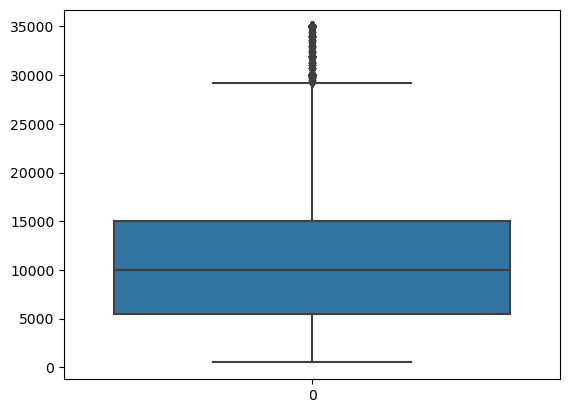

<Figure size 640x480 with 0 Axes>

In [71]:
plt.style.use("default")
sns.boxplot(df1.loan_amnt)
plt.show()
plt.savefig("seaborn_plot18.jpg",format='jpg')

######  Conclusion : Above boxplot shows outliers are present in loan_amnt col.

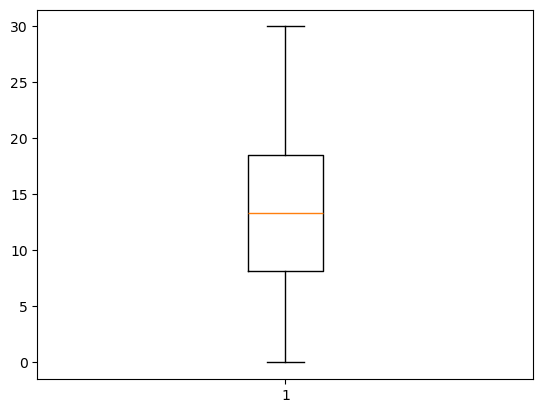

<Figure size 640x480 with 0 Axes>

In [72]:
plt.style.use("default")
plt.boxplot(df1.dti)
plt.show()
plt.savefig("seaborn_plot17.jpg",format='jpg')

###### Above plot shows there are no outliers present in dti col.

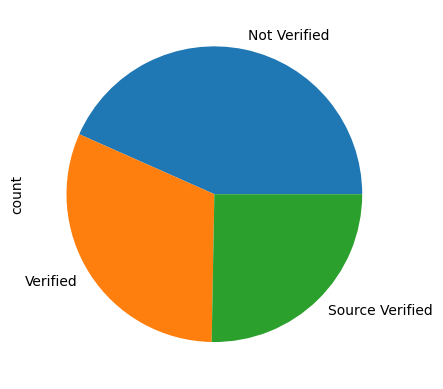

<Figure size 640x480 with 0 Axes>

In [73]:
plt.style.use("default")
df1.verification_status.value_counts().plot.pie()
plt.show()
plt.savefig("matplotlib_plot16.jpg",format='jpg')


##### almost 50% of customer  are not verified by agency

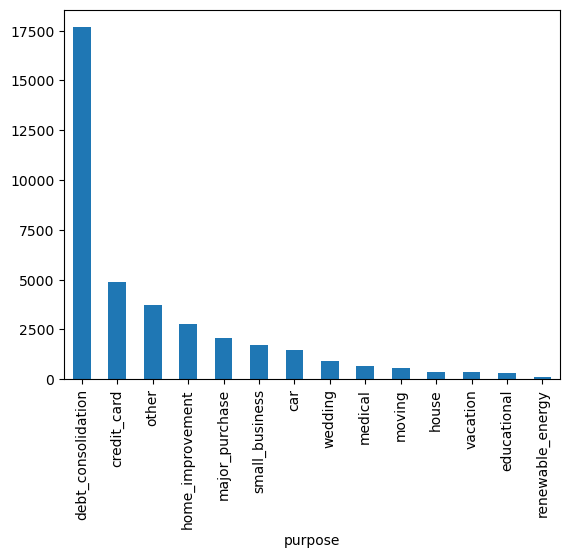

<Figure size 640x480 with 0 Axes>

In [74]:
plt.style.use("default")
df1.purpose.value_counts().plot.bar()
plt.show()
plt.savefig("seaborn_plot15.jpg",format='jpg')

##### No. of person is higher  who have taken a loan for debt consolidation

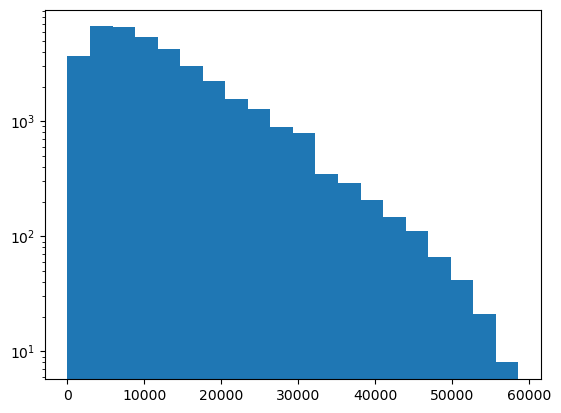

In [75]:
plt.hist(df1.total_pymnt,bins=20,log=True,align='mid',orientation='vertical')
plt.savefig("seaborn_plot14.jpg",format='jpg')

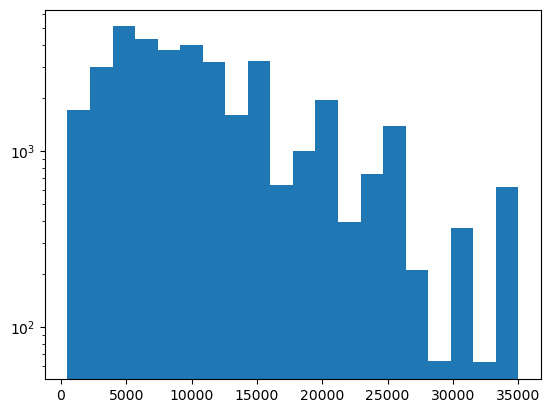

In [76]:
plt.hist(df1.loan_amnt,bins=20,log=True,align='mid',orientation='vertical')
plt.savefig("seaborn_plot13.jpg",format='jpg')

#### Most of loans have lesser then 15000 are paid by customer

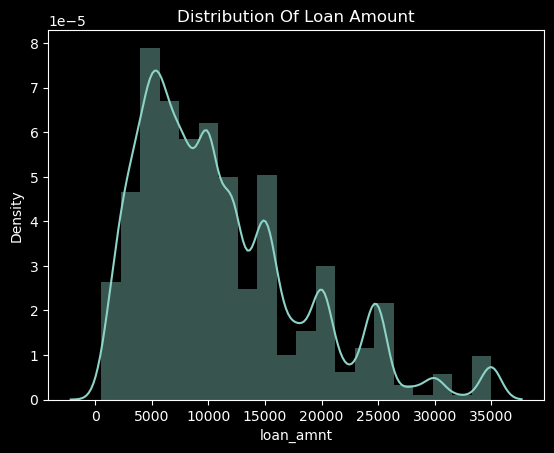

<Figure size 640x480 with 0 Axes>

In [77]:
plt.style.use("dark_background")
sns.distplot(df1.loan_amnt,bins=20)
plt.title("Distribution Of Loan Amount")
plt.show()
plt.savefig("seaborn_plot12.jpg",format='jpg')

# Bivariate Analysis Visualization

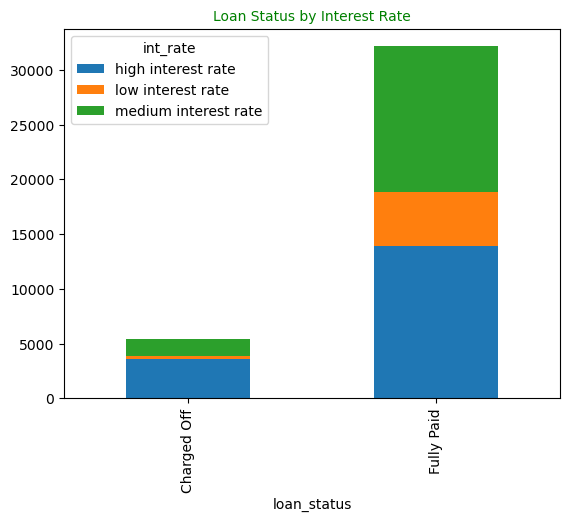

In [78]:
plt.style.use("default")
df1.groupby(['loan_status','int_rate']).size().unstack().plot(kind="bar",stacked=True)
plt.title("Loan Status by Interest Rate",fontdict={'fontsize':10,'color':'green'})
plt.savefig("seaborn_plot11.jpg",format='jpg')

##### those people who have living in rented house they are slighlty higher loan charged off their loan


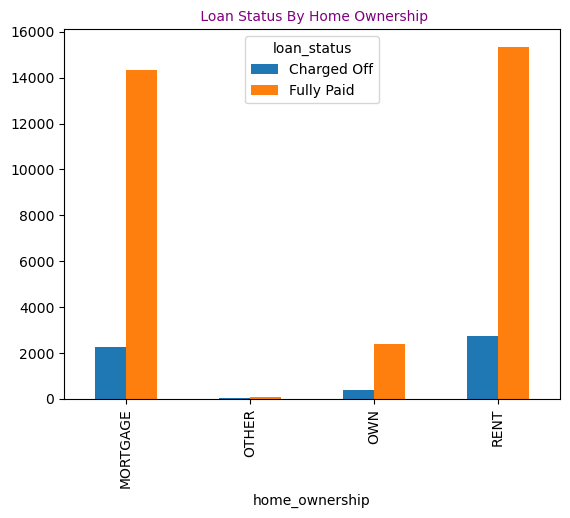

In [79]:
df1.groupby(['home_ownership','loan_status']).size().unstack().plot(kind='bar',stacked=False)
plt.title(" Loan Status By Home Ownership",fontdict={'fontsize':10,'fontweight':5,'color':'Purple'})
plt.savefig("seaborn_plot10.jpg",format='jpg')


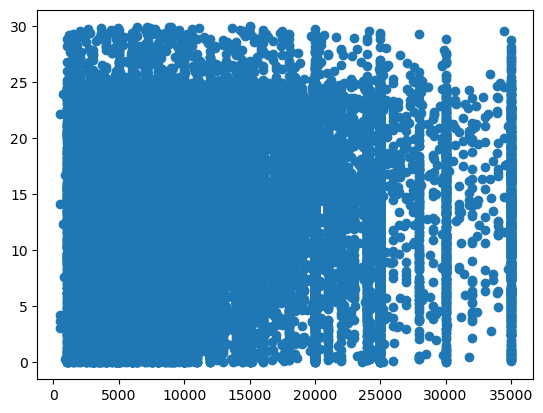

<Figure size 640x480 with 0 Axes>

In [80]:
plt.scatter(df1.loan_amnt,df1.dti)
plt.show()
plt.savefig("seaborn_plot9.jpg",format='jpg')

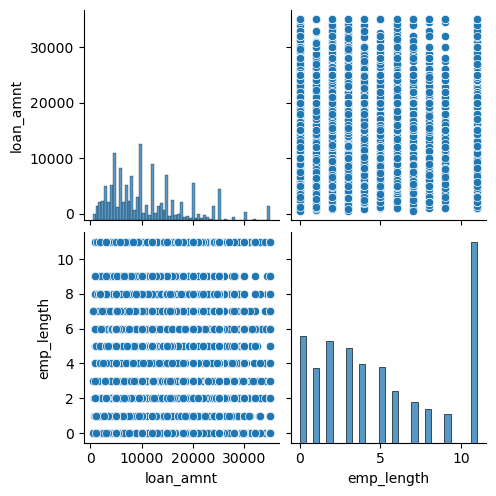

<Figure size 640x480 with 0 Axes>

In [81]:
sns.pairplot(df1[['loan_amnt','emp_length']])
plt.show()
plt.savefig("seaborn_plot8.jpg",format='jpg')

##### those have lesser employee length have taken a large no. of loan

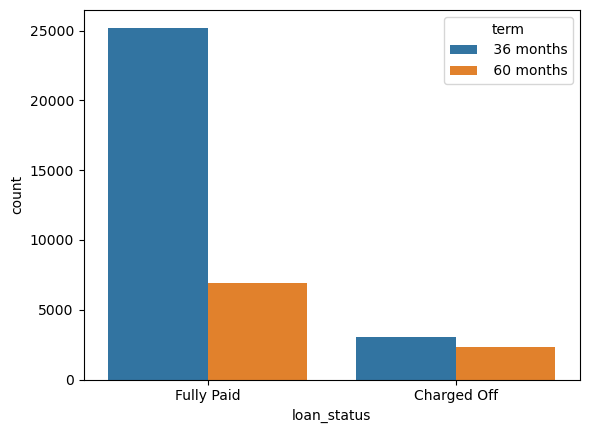

In [82]:
sns.countplot(data=df1,x="loan_status",hue="term")
plt.savefig("seaborn_plot7.jpg",format='jpg')

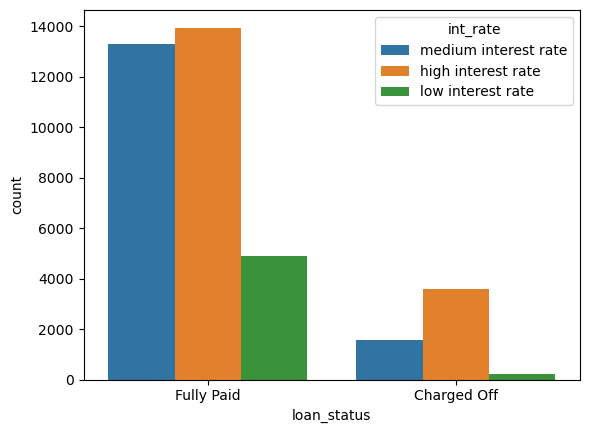

In [83]:
sns.countplot(data=df1,x="loan_status",hue="int_rate")
plt.savefig("seaborn_plot6.jpg",format='jpg')

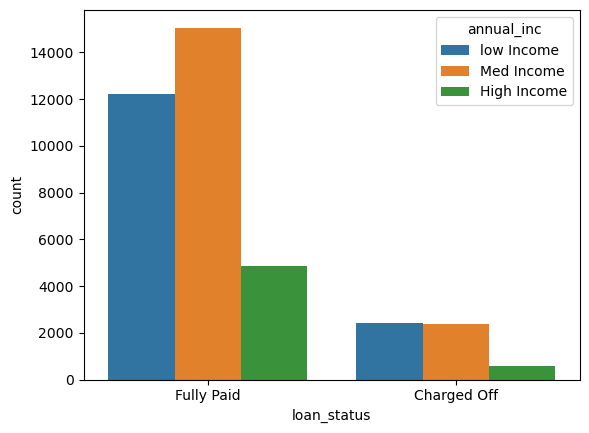

In [84]:
sns.countplot(data=df1,x="loan_status",hue="annual_inc")
plt.savefig("seaborn_plot5.jpg",format='jpg')

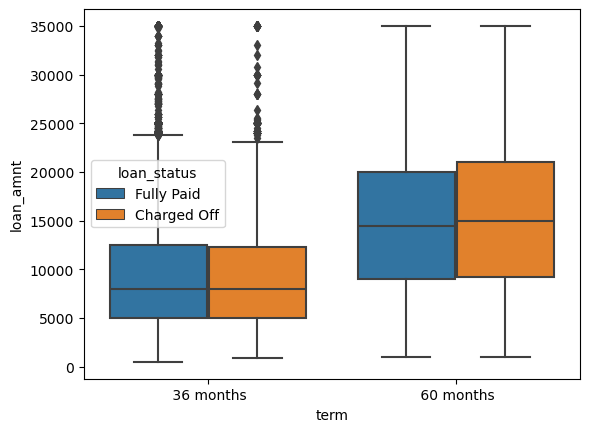

In [85]:
sns.boxplot(data=df1,y="loan_amnt",x='term',hue='loan_status')
plt.savefig("seaborn_plot4.jpg",format='jpg')

# Multi Variate Analysis Visualization

In [86]:
res = pd.pivot_table(data=df1,index="purpose",columns="loan_status",values="loan_amnt",aggfunc=np.mean)

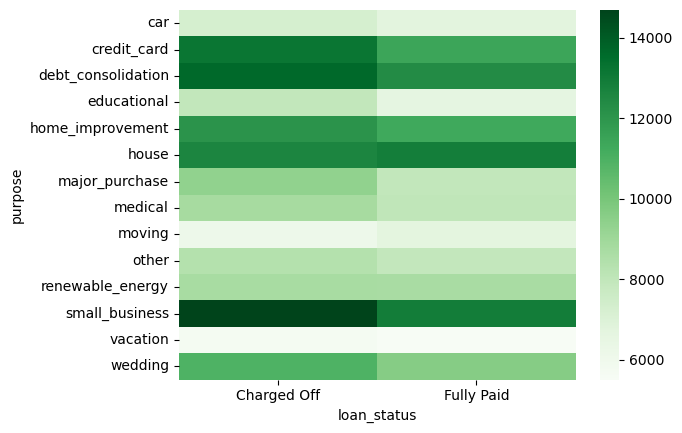

<Figure size 640x480 with 0 Axes>

In [87]:
sns.heatmap(res,cmap="Greens",annot=False)
plt.show()
plt.savefig("seaborn_plot3.jpg",format='jpg')

##### avg loan of rs 14000 are charged off  for debt consolidation purpose

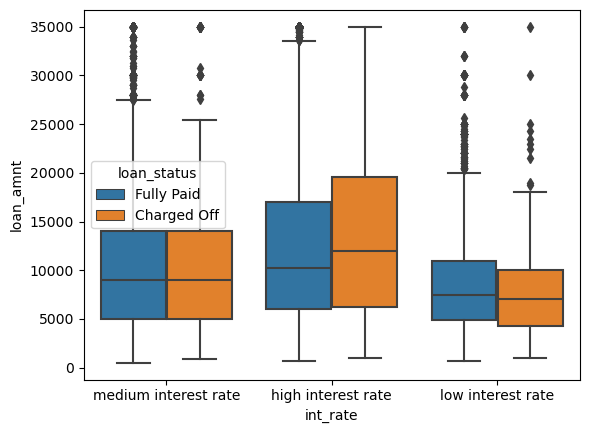

In [88]:
sns.boxplot(x='int_rate', y= 'loan_amnt', hue= 'loan_status',data= df1)
plt.savefig("seaborn_plot2.jpg",format='jpg')

######  those who have taken loan on high interest they are faced to charged off

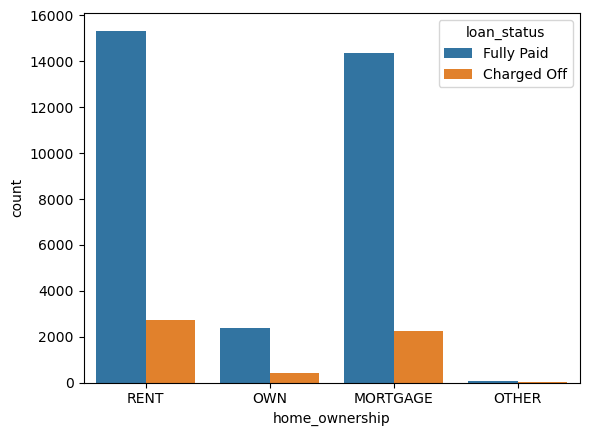

In [89]:
sns.countplot( x='home_ownership',hue='loan_status', data=df1)
plt.savefig("seaborn_plot1.jpg",format='jpg')

###### borrowers who are living in rented house these kind people of loans are slightly higher charged off

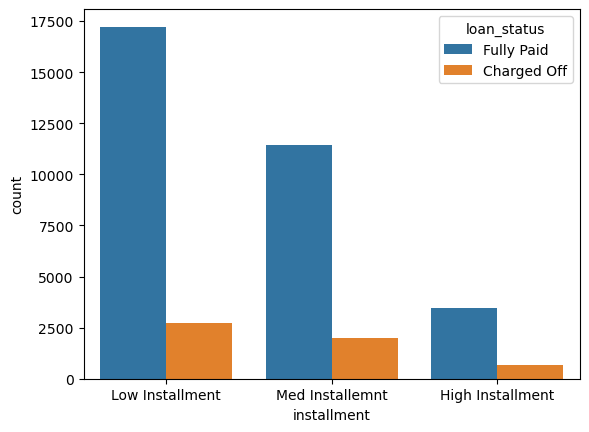

In [91]:
sns.countplot( x='installment',hue='loan_status', data=df1)
plt.savefig("seaborn_plot25.jpg",format='jpg')